In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import math
from sklearn.model_selection import train_test_split

%matplotlib inline

Нека си заредим train сета, и директно да разделим колоните на числови и категорийни.

Нека след това запълним празните места по подходящ начин.

In [2]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
numeric_column_names = train.describe().columns.drop(labels=["SalePrice"])
categorical_column_names = train.dtypes[train.dtypes == 'object'].index

train[numeric_column_names] = train[numeric_column_names].fillna(0);
train[categorical_column_names] = train[categorical_column_names].fillna('');

In [3]:
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

Да погледнем числовите колони:

In [4]:
pd.options.display.max_columns = 36
pd.options.display.max_rows = 10
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,58.414873,58.435421,10735.380626,6.073386,5.545988,1971.486301,1984.690802,105.003914,443.613503,45.534247,573.775930,1062.923679,1163.329746,348.274951,5.100783,1516.705479,0.404110,0.055773,1.576321,0.366928,2.853229,1.048924,6.522505,0.607632,1883.831703,1.776908,478.014677,91.718200,48.040117,21.546967,3.934442,14.780822,3.440313,39.080235,6.277886,2007.829746
std,44.416250,35.430350,11344.844137,1.373991,1.096401,30.262989,20.737629,181.735760,464.425961,155.139109,445.058138,447.587824,392.060942,437.429167,44.532534,527.776850,0.516242,0.233822,0.548836,0.494239,0.844400,0.229025,1.646824,0.642641,423.633699,0.733376,212.612947,125.674902,68.896801,58.997097,32.831010,55.423160,45.265717,335.892594,2.731375,1.333798
min,20.000000,0.000000,1300.000000,2.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,41.000000,7564.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,229.250000,796.000000,888.000000,0.000000,0.000000,1125.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,63.000000,9544.500000,6.000000,5.000000,1972.500000,1993.500000,0.000000,380.500000,0.000000,485.000000,995.000000,1080.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,168.000000,719.750000,0.000000,813.500000,1299.750000,1390.500000,729.000000,0.000000,1786.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2153.000000,6110.000000,4692.000000,2065.000000,528.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,318.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


Чакай малко.. тук някои колони изглеждат сякаш не принадлежат особенно към numeric columns..
Нека почетем малко описание на тях.

In [5]:
file = open('data/house-prices/data_description.txt', 'r')
for line in file:
    print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

Аха! Е, значи изглежда, че линейна връзка най-вероятно няма в MSSubClass, OverallQual, OverallCond, YearBuilt, YearRedomAdd,
BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars,
MoSold, YrSold.

Нека отразим това в индексацията.


In [6]:
num_cat = pd.Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'])
numeric_column_names = numeric_column_names.drop(num_cat);
numeric_onehot_columns = pd.Index(num_cat);
#categorical_column_names = categorical_column_names.append(pd.Index(num_cat));
print("numeric columns:\n ", numeric_column_names)
print("numeric categorical columns:\n ", numeric_onehot_columns)

numeric columns:
  Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')
numeric categorical columns:
  Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')


In [7]:
regressor = LinearRegression().fit(x_train[numeric_column_names], y_train)
print(regressor.intercept_, " + ",)
list(zip(regressor.coef_, "*"*len(regressor.coef_), numeric_column_names, ))

-1303.5508913628873  + 


[(-2.6655798863047018, '*', 'LotFrontage'),
 (0.172352497454467, '*', 'LotArea'),
 (37.40983986124063, '*', 'MasVnrArea'),
 (18.051643406795176, '*', 'BsmtFinSF1'),
 (1.6881636775364193, '*', 'BsmtFinSF2'),
 (10.268988391417128, '*', 'BsmtUnfSF'),
 (30.008795475748702, '*', 'TotalBsmtSF'),
 (31.45315236891126, '*', '1stFlrSF'),
 (41.43526777145333, '*', '2ndFlrSF'),
 (-55.11618014258066, '*', 'LowQualFinSF'),
 (17.772239997783803, '*', 'GrLivArea'),
 (93.8216288203945, '*', 'GarageArea'),
 (60.07151380601626, '*', 'WoodDeckSF'),
 (45.596777170679026, '*', 'OpenPorchSF'),
 (-51.25571387158614, '*', 'EnclosedPorch'),
 (68.37685182842826, '*', '3SsnPorch'),
 (66.91798010355015, '*', 'ScreenPorch'),
 (-47.703141615575156, '*', 'PoolArea'),
 (-6.824379520735728, '*', 'MiscVal')]

Искаме да one-hot-encode-нем както категорийните колони, така и тези числови колони, в който няма линейна зависимост.

In [8]:
one_hot_columns = categorical_column_names.append(numeric_onehot_columns)

one_hot_encoder = OneHotEncoder().fit(train[one_hot_columns])

print(one_hot_encoder.transform(train[one_hot_columns]).shape)
print(y_train.shape)

(1460, 637)
(1022,)


### Да натренираме... регресор само с тези данни

In [9]:
one_hot_x_train = one_hot_encoder.transform(x_train[one_hot_columns])

cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(x_test[one_hot_columns])
print(cat_regression.score(one_hot_x_test, y_test))

0.9462210248078654
0.7243900373942552


In [10]:
x_train[numeric_column_names].shape, one_hot_x_train.shape

((1022, 19), (1022, 637))

In [11]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
print(new_x_train.shape, new_x_test.shape)

(1022, 656) (438, 656)


40       4
180     10
45      12
75      16
85      20
      ... 
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, Length: 15, dtype: int64

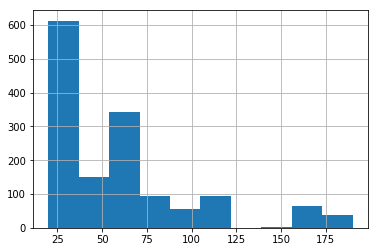

In [12]:
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])
data = test[categorical_column_names.append(numeric_onehot_columns)]
data.iloc[:,43].hist();

train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
data = train[categorical_column_names.append(numeric_onehot_columns)]
data.iloc[:,43].value_counts().sort_values()

HOMEWORK 1:

Започваме с намиране на правилната регуляризация. Използваме ridge върху логаритмизираните данни.

In [13]:
alpha = []
maxTest = [0,0,0]
curTest = [0,0,0]
for i in range (1, 100):
    all_data_lr = Ridge(alpha = i).fit(new_x_train, pd.np.log10(y_train))
    curTest[0] = all_data_lr.score(new_x_train, pd.np.log10(y_train))
    curTest[1] = all_data_lr.score(new_x_test, pd.np.log10(y_test))
    curTest[2] = i
    if(maxTest[1] < curTest[1]):
        maxTest = curTest[:]
        
alpha = maxTest[2]
        
print ("train score: ", maxTest[0])
print ("test score: ", maxTest[1])
print ("alpha: ", alpha)

train score:  0.9256299110646402
test score:  0.9127738068116433
alpha:  15


In [14]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])

onehot_def_data = train.append(test, sort=False)
onehot_def_data.shape

onehot_def_data[categorical_column_names] = onehot_def_data[categorical_column_names].fillna("")
onehot_def_data[numeric_onehot_columns] = onehot_def_data[numeric_onehot_columns].fillna(0)

one_hot_encoder = OneHotEncoder().fit(onehot_def_data[categorical_column_names.append(numeric_onehot_columns)])


In [15]:
def pipeline_data(data):
    data[numeric_column_names.append(numeric_onehot_columns)] = data[numeric_column_names.append(numeric_onehot_columns)].fillna(0)
    data[categorical_column_names] = data[categorical_column_names].fillna("")
    _numeric = data[numeric_column_names]
    _one_hot = data[categorical_column_names.append(numeric_onehot_columns)]
    _one_hot_encoded = one_hot_encoder.transform(_one_hot)
    _merged = pd.np.concatenate([_one_hot_encoded.todense(), _numeric], axis=1)
    return _merged

In [16]:
full_x = pipeline_data(train)
full_y = train['SalePrice']

# Fix test set missing data problems
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)

test_set = pipeline_data(test)

По-нагоре експериментално намерихме, че ridge с alpha=20 работи най-добр с логаритмуваните данни.
Забележка: След някакво количество експериментиране с lasso, решаваме че ridge е по-добра идея за тези данни.
Това ни носи позиция 1436 в kaggle.

In [17]:
ridge = Ridge(alpha=alpha).fit(full_x, pd.np.log10(full_y))

In [18]:
predictions = 10**ridge.predict(test_set)
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})

Нека проверим дали ще си струва да закръгляме, и докъде:

In [19]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
print(len(train[train['SalePrice']%100 == 0]))
print(len(train[train['SalePrice']%500 == 0]))
print(len(train[train['SalePrice']%1000 == 0]))

1325
1163
891


Решаваме, че най-добра идея ще бъде да закръглим до първите 3 знака.
Unfortunately, kaggle не е съгласен с нашият ред на мисли, и не успяваме да си подобрим резултата ;(
След като не успяваме и със закръгляне до първите 2 знака, решаваме да спрем да си гърмим daily опитите за глупости, и да пробваме нещо различно.

In [20]:
predictions_backup = predictions_df.copy()

for i in range(0, len(predictions_df)):
    pred = predictions_df['SalePrice'][i]
    if(abs(pred/1000 - math.ceil(pred/1000)) < abs(pred/1000 - math.floor(pred/1000))):
        predictions_df.loc[i, 'SalePrice'] = math.ceil(pred/1000) * 1000
    else:
        predictions_df.loc[i, 'SalePrice']  = math.floor(pred/1000) * 1000

print(predictions_df.head())

predictions_df = predictions_backup

     Id  SalePrice
0  1461   123000.0
1  1462   153000.0
2  1463   181000.0
3  1464   197000.0
4  1465   184000.0


In [21]:
predictions_df.to_csv("/Users/Kaloyan/Documents/JupyterNotebooks/submit_me.csv", index=False)
predictions_df.head()

,Id,SalePrice
0,1461,123130.981080
1,1462,152786.505907
2,1463,180531.448630
3,1464,196841.813484
4,1465,184207.707179
